In [14]:
# link do github: https://github.com/themestrre/Metodos-Numericos

# **Nome:** Carlos Eduardo Leite de Oliveira

# **Matricula:** 242104345

# **MÉTODOS NUMÉRICOS EM CIÊNCIAS MECÂNICAS**

import numpy as np
import matplotlib.pyplot as plt

# Função do polinômio de 5º ordem

In [15]:
# Função
def f(x):
    return (x - 1)*(x - 3)*(x - 5)*(x - 7)*(x - 9)

# Método da Secante

In [16]:
# Método da Secante
def secante(f, x0, x1, tol=1e-10, max_iter=100):
    erros = []
    for i in range(max_iter):
        fx0, fx1 = f(x0), f(x1)
        if fx1 - fx0 == 0:
            break
        x2 = x1 - fx1*(x1 - x0)/(fx1 - fx0)
        erro = abs((x2 - x1)/x2)
        erros.append(erro)
        if erro < tol:
            break
        x0, x1 = x1, x2
    return x2, np.array(erros)

# Método de Muller


In [17]:
def muller(f, x0, x1, x2, tol=1e-10, max_iter=100):
    erros = []
    for i in range(max_iter):
        f0, f1, f2 = f(x0), f(x1), f(x2)
        h0, h1 = x1 - x0, x2 - x1
        if h0 == 0 or h1 == 0:
            break
        d0 = (f1 - f0) / h0
        d1 = (f2 - f1) / h1
        a = (d1 - d0) / (h1 + h0)
        b = a * h1 + d1
        c = f2
        rad = np.sqrt(b**2 - 4*a*c)
        denom = b + rad if abs(b + rad) > abs(b - rad) else b - rad
        if denom == 0:
            break
        dxr = -2 * c / denom
        x3 = x2 + dxr
        erro = abs((x3 - x2)/x3)
        erros.append(erro)
        if erro < tol:
            break
        x0, x1, x2 = x1, x2, x3
    return x3, np.array(erros)

# Execução dos métodos


In [18]:
# Entrada da lista de x0
x0_str = input("\nDigite a lista de valores x0 (exemplo: 0.5, 2.0, 4.1, 6.5, 8.4): ")
x0_values = [float(x.strip()) for x in x0_str.split(',')]

# Dados de simulação
delta_x = 0.05
tol = 1e-10
max_iter = 100

# Criar listas para armazenar os erros
erros_secante = []
erros_muller = []

# Executar para cada valor de x0
for x0 in x0_values:
    # Secante
    raiz_sec, err_sec = secante(f, x0, x0 + delta_x, tol, max_iter)
    erros_secante.append(err_sec)
    np.savetxt(f'secante_x0_{x0}.dat', err_sec)

    # Müller
    raiz_mul, err_mul = muller(f, x0, x0 + delta_x, x0 + 2*delta_x, tol, max_iter)
    erros_muller.append(err_mul)
    np.savetxt(f'muller_x0_{x0}.dat', err_mul)


Digite a lista de valores x0 (exemplo: 0.5, 2.0, 4.1, 6.5, 8.4): 0.5, 2.0, 4.1, 6.5, 8.4


# Gráfico

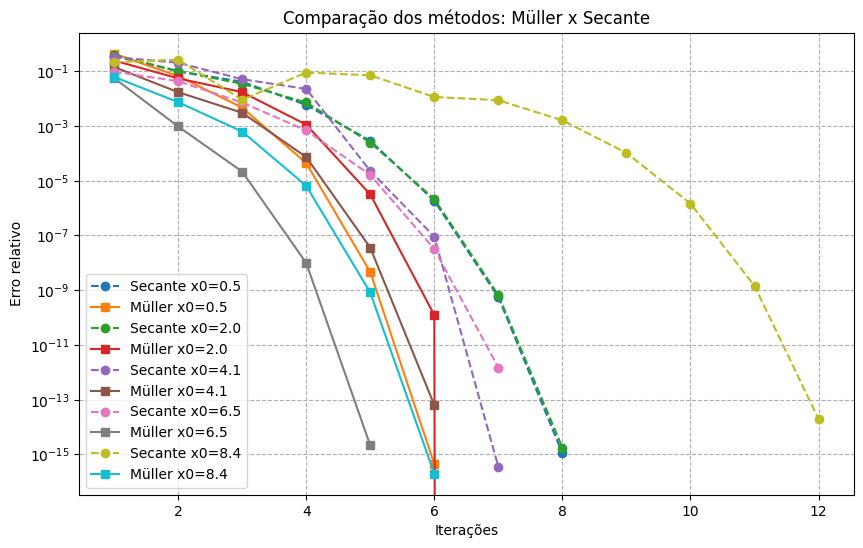

In [19]:
# Gráfico comparativo
plt.figure(figsize=(10,6))
for i, x0 in enumerate(x0_values):
    plt.semilogy(range(1, len(erros_secante[i])+1), erros_secante[i], 'o--', label=f'Secante x0={x0}')
    plt.semilogy(range(1, len(erros_muller[i])+1), erros_muller[i], 's-', label=f'Müller x0={x0}')

plt.xlabel('Iterações')
plt.ylabel('Erro relativo')
plt.title('Comparação dos métodos: Müller x Secante')
plt.grid(True, which="both", ls="--")
plt.legend()
plt.show()
